## Questions 
<br>
1) 
<br>
2) Normalize t-statistic for brain plots. Does it matter? 

### Conditions description:
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
#from nilearn.glm import fdr_threshold
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc



/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [2]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe
c1_pc_df = pd.DataFrame()
c2_pc_df = pd.DataFrame()
c3_pc_df = pd.DataFrame()
c4_pc_df = pd.DataFrame()

c1_wcs_df = pd.DataFrame()
c2_wcs_df = pd.DataFrame()
c3_wcs_df = pd.DataFrame()
c4_wcs_df = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_mean = np.mean(pc_c1, axis=0)
        c2_pc_mean = np.mean(pc_c2, axis=0)
        c3_pc_mean = np.mean(pc_c3, axis=0)
        c4_pc_mean = np.mean(pc_c4, axis=0)
        
        c1_wcs_mean = np.mean(wcs_c1, axis=0)
        c2_wcs_mean = np.mean(wcs_c2, axis=0)
        c3_wcs_mean = np.mean(wcs_c3, axis=0)
        c4_wcs_mean = np.mean(wcs_c4, axis=0)
        
        # Appending data to df
        c1_pc_df[name] = c1_pc_mean
        c2_pc_df[name] = c2_pc_mean
        c3_pc_df[name] = c3_pc_mean
        c4_pc_df[name] = c4_pc_mean
        
        c1_wcs_df[name] = c1_wcs_mean
        c2_wcs_df[name] = c2_wcs_mean
        c3_wcs_df[name] = c3_wcs_mean
        c4_wcs_df[name] = c4_wcs_mean

             
print("c1_pc_df shape: " + str(c1_pc_df.shape))
print("c2_pc_df shape: " + str(c2_pc_df.shape))
print("c3_pc_df shape: " + str(c3_pc_df.shape))
print("c4_pc_df shape: " + str(c4_pc_df.shape))

print("c1_wcs_df shape: " + str(c1_wcs_df.shape))
print("c2_wcs_df shape: " + str(c2_wcs_df.shape))
print("c3_wcs_df shape: " + str(c3_wcs_df.shape))
print("c4_wcs_df shape: " + str(c4_wcs_df.shape))

c1_pc_df shape: (400, 26)
c2_pc_df shape: (400, 26)
c3_pc_df shape: (400, 26)
c4_pc_df shape: (400, 26)
c1_wcs_df shape: (400, 26)
c2_wcs_df shape: (400, 26)
c3_wcs_df shape: (400, 26)
c4_wcs_df shape: (400, 26)


In [3]:
# Sample of created dataframes
c1_pc_df.head()

,sub-102,sub-104,sub-105,sub-106,sub-107,sub-108,sub-109,sub-110,sub-112,sub-114,...,sub-121,sub-122,sub-123,sub-124,sub-125,sub-126,sub-129,sub-130,sub-131,sub-132
0,0.115011,0.286804,0.262997,0.087564,0.426024,0.284416,0.182126,0.157131,0.086948,0.297955,...,0.103673,0.021792,0.560712,0.032396,0.030684,0.158919,0.491707,0.403133,0.395990,0.244808
1,0.097255,0.091828,0.243083,0.078283,0.135999,0.256268,0.180285,0.182380,0.048800,0.331151,...,0.117178,0.443905,0.540775,0.042534,0.000000,0.211439,0.403782,0.171211,0.194801,0.181660
2,0.337252,0.210984,0.007814,0.233148,0.316818,0.070678,0.078387,0.041438,0.116919,0.159754,...,0.186559,0.116300,0.092956,0.076612,0.137011,0.028801,0.326440,0.416036,0.473224,0.231535
3,0.322502,0.271412,0.023234,0.481783,0.358541,0.007587,0.015870,0.246329,0.132701,0.149647,...,0.021162,0.033860,0.333721,0.154242,0.066557,0.000000,0.074858,0.373621,0.374614,0.373869
4,0.177062,0.219191,0.004820,0.144924,0.503120,0.000000,0.000000,0.055024,0.000000,0.094352,...,0.031388,0.000000,0.080132,0.171400,0.000000,0.000000,0.158256,0.226289,0.355584,0.213139


In [4]:
# Computing mean across participants for each condition
c1_total_pc_mean = np.array(c1_pc_df.mean(axis=1))
c2_total_pc_mean = np.array(c2_pc_df.mean(axis=1))
c3_total_pc_mean = np.array(c3_pc_df.mean(axis=1))
c4_total_pc_mean = np.array(c4_pc_df.mean(axis=1))

print("c1_total_pc_mean shape: " + str(c1_total_pc_mean.shape))
print("c2_total_pc_mean shape: " + str(c2_total_pc_mean.shape))
print("c3_total_pc_mean shape: " + str(c3_total_pc_mean.shape))
print("c4_total_pc_mean shape: " + str(c4_total_pc_mean.shape))

c1_total_wcs_mean = np.array(c1_wcs_df.mean(axis=1))
c2_total_wcs_mean = np.array(c2_wcs_df.mean(axis=1))
c3_total_wcs_mean = np.array(c3_wcs_df.mean(axis=1))
c4_total_wcs_mean = np.array(c4_wcs_df.mean(axis=1))

print("c1_total_wcs_mean shape: " + str(c1_total_wcs_mean.shape))
print("c2_total_wcs_mean shape: " + str(c2_total_wcs_mean.shape))
print("c3_total_wcs_mean shape: " + str(c3_total_wcs_mean.shape))
print("c4_total_wcs_mean shape: " + str(c4_total_wcs_mean.shape))

c1_total_pc_mean shape: (400,)
c2_total_pc_mean shape: (400,)
c3_total_pc_mean shape: (400,)
c4_total_pc_mean shape: (400,)
c1_total_wcs_mean shape: (400,)
c2_total_wcs_mean shape: (400,)
c3_total_wcs_mean shape: (400,)
c4_total_wcs_mean shape: (400,)


## Compute differences between conditions

In [5]:
# Differences between pc
PC_C4_C1 = np.array(c4_total_pc_mean - c1_total_pc_mean)
PC_C4_C2 = np.array(c4_total_pc_mean - c2_total_pc_mean)
PC_C4_C3 = np.array(c4_total_pc_mean - c3_total_pc_mean)
PC_C3_C1 = np.array(c3_total_pc_mean - c1_total_pc_mean)
PC_C3_C2 = np.array(c3_total_pc_mean - c2_total_pc_mean)
PC_C2_C1 = np.array(c2_total_pc_mean - c1_total_pc_mean)

print("PC_C4_C1 shape: " + str(PC_C4_C1.shape))
print("PC_C4_C2 shape: " + str(PC_C4_C2.shape))
print("PC_C4_C3 shape: " + str(PC_C4_C3.shape))
print("PC_C3_C1 shape: " + str(PC_C3_C1.shape))
print("PC_C3_C2 shape: " + str(PC_C3_C2.shape))
print("PC_C2_C1 shape: " + str(PC_C3_C2.shape))

WCS_C4_C1 = np.array(c4_total_wcs_mean - c1_total_wcs_mean)
WCS_C4_C2 = np.array(c4_total_wcs_mean - c2_total_wcs_mean)
WCS_C4_C3 = np.array(c4_total_wcs_mean - c3_total_wcs_mean)
WCS_C3_C1 = np.array(c3_total_wcs_mean - c1_total_wcs_mean)
WCS_C3_C2 = np.array(c3_total_wcs_mean - c2_total_wcs_mean)
WCS_C2_C1 = np.array(c2_total_wcs_mean - c1_total_wcs_mean)

print("WCS_C4_C1 shape: " + str(WCS_C4_C1.shape))
print("WCS_C4_C2 shape: " + str(WCS_C4_C2.shape))
print("WCS_C4_C3 shape: " + str(WCS_C4_C3.shape))
print("WCS_C3_C1 shape: " + str(WCS_C3_C1.shape))
print("WCS_C3_C2 shape: " + str(WCS_C3_C2.shape))
print("WCS_C2_C1 shape: " + str(WCS_C3_C2.shape))


PC_C4_C1 shape: (400,)
PC_C4_C2 shape: (400,)
PC_C4_C3 shape: (400,)
PC_C3_C1 shape: (400,)
PC_C3_C2 shape: (400,)
PC_C2_C1 shape: (400,)
WCS_C4_C1 shape: (400,)
WCS_C4_C2 shape: (400,)
WCS_C4_C3 shape: (400,)
WCS_C3_C1 shape: (400,)
WCS_C3_C2 shape: (400,)
WCS_C2_C1 shape: (400,)


## Run t-tests

In [6]:
from scipy.stats import ttest_rel, normaltest

# Extract labels 
par_data = pd.read_csv("Parcellations/MNI/Centroid_coordinates/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv")
labels = np.array(par_data["ROI Name"]).reshape(400, 1)

def run_ttest_and_fdr(data1, data2, name2save):
    
    data1 = np.array(data1)
    data2 = np.array(data2)

    results = np.zeros((400, 5))

    for x in range(400):
        
         # Calculate paired-sample two-tailed t-test
        results[x, 0], results[x, 1] = ttest_rel(data1[x, :], data2[x, :], nan_policy="omit", alternative="two-sided")
        
        if(0.05 > results[x, 1]):
            results[x, 2] = True
        else:
            results[x, 2] = False    
    
    # Calculate false discovery rate (fdr) Benjamini/Hochberg
    results[:, 4], results[:, 3] = fdr_correction(results[:, 1], alpha=0.05, method='indep')
    
    # Append results to DataFrame
    results_df = pd.DataFrame(results, columns=["t_statistic", "p_val", "rej_null(x<0.05)", "corrected_p_val", "fdr_rej_null(x<0.05)"])
    results_df["label"] = labels      
    path = str("GitHub/Summer_2021_fMRI/t_tests_csv/t_test_PC&WCS_DifferencesBetweenConditions" + name2save + ".csv")
    results_df.to_csv(path, sep='\t')
    
    return results_df

# Sample of t-test results
PC_tt_C1_C2 = run_ttest_and_fdr(c1_pc_df, c2_pc_df, "PC_tt_C1_C2")
PC_tt_C1_C2.head(10)

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-2.134881,0.042756,1.0,0.984312,0.0,7Networks_LH_Vis_1
1,-0.716776,0.480155,0.0,0.984312,0.0,7Networks_LH_Vis_2
2,-0.476251,0.638032,0.0,0.984312,0.0,7Networks_LH_Vis_3
3,-0.952909,0.349760,0.0,0.984312,0.0,7Networks_LH_Vis_4
4,-1.013181,0.320680,0.0,0.984312,0.0,7Networks_LH_Vis_5
5,-0.639757,0.528150,0.0,0.984312,0.0,7Networks_LH_Vis_6
6,-1.153071,0.259787,0.0,0.984312,0.0,7Networks_LH_Vis_7
7,-0.559198,0.581002,0.0,0.984312,0.0,7Networks_LH_Vis_8
8,-0.001745,0.998622,0.0,0.999033,0.0,7Networks_LH_Vis_9
9,-0.076008,0.940018,0.0,0.984312,0.0,7Networks_LH_Vis_10


In [7]:


# "the t-value of the difference" -> compute t-test between conditions? 

In [8]:
PC_tt_C1_C2 = run_ttest_and_fdr(c1_pc_df, c2_pc_df, "PC_tt_C1_C2")
PC_tt_C1_C3 = run_ttest_and_fdr(c1_pc_df, c3_pc_df, "PC_tt_C1_C3")
PC_tt_C1_C4 = run_ttest_and_fdr(c1_pc_df, c4_pc_df, "PC_tt_C1_C4")
PC_tt_C2_C3 = run_ttest_and_fdr(c2_pc_df, c3_pc_df, "PC_tt_C2_C3")
PC_tt_C2_C4 = run_ttest_and_fdr(c2_pc_df, c4_pc_df, "PC_tt_C2_C4")
PC_tt_C3_C4 = run_ttest_and_fdr(c3_pc_df, c4_pc_df, "PC_tt_C3_C4")

print("PC_tt_C1_C2 shape: " + str(PC_tt_C1_C2.shape))
print("PC_tt_C1_C3 shape: " + str(PC_tt_C1_C3.shape))
print("PC_tt_C1_C4 shape: " + str(PC_tt_C1_C4.shape))
print("PC_tt_C2_C3 shape: " + str(PC_tt_C2_C3.shape))
print("PC_tt_C2_C4 shape: " + str(PC_tt_C2_C4.shape))
print("PC_tt_C3_C4 shape: " + str(PC_tt_C3_C4.shape))

WCS_tt_C1_C2 = run_ttest_and_fdr(c1_wcs_df, c2_wcs_df, "WCS_tt_C1_C2")
WCS_tt_C1_C3 = run_ttest_and_fdr(c1_wcs_df, c3_wcs_df, "WCS_tt_C1_C3")
WCS_tt_C1_C4 = run_ttest_and_fdr(c1_wcs_df, c4_wcs_df, "WCS_tt_C1_C4")
WCS_tt_C2_C3 = run_ttest_and_fdr(c2_wcs_df, c3_wcs_df, "WCS_tt_C2_C3")
WCS_tt_C2_C4 = run_ttest_and_fdr(c2_wcs_df, c4_wcs_df, "WCS_tt_C2_C4")
WCS_tt_C3_C4 = run_ttest_and_fdr(c3_wcs_df, c4_wcs_df, "WCS_tt_C3_C4")

print("\nWCS_tt_C1_C2 shape: " + str(WCS_tt_C1_C2.shape))
print("WCS_tt_C1_C3 shape: " + str(WCS_tt_C1_C3.shape))
print("WCS_tt_C1_C4 shape: " + str(WCS_tt_C1_C4.shape))
print("WCS_tt_C2_C3 shape: " + str(WCS_tt_C2_C3.shape))
print("WCS_tt_C2_C4 shape: " + str(WCS_tt_C2_C4.shape))
print("WCS_tt_C3_C4 shape: " + str(WCS_tt_C3_C4.shape))


PC_tt_C1_C2 shape: (400, 6)
PC_tt_C1_C3 shape: (400, 6)
PC_tt_C1_C4 shape: (400, 6)
PC_tt_C2_C3 shape: (400, 6)
PC_tt_C2_C4 shape: (400, 6)
PC_tt_C3_C4 shape: (400, 6)

WCS_tt_C1_C2 shape: (400, 6)
WCS_tt_C1_C3 shape: (400, 6)
WCS_tt_C1_C4 shape: (400, 6)
WCS_tt_C2_C3 shape: (400, 6)
WCS_tt_C2_C4 shape: (400, 6)
WCS_tt_C3_C4 shape: (400, 6)


In [9]:
PC_tt_C1_C2[PC_tt_C1_C2["rej_null(x<0.05)"] == 1]


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-2.134881,0.042756,1.0,0.984312,0.0,7Networks_LH_Vis_1
23,-2.645176,0.013910,1.0,0.984312,0.0,7Networks_LH_Vis_24
33,2.530761,0.018049,1.0,0.984312,0.0,7Networks_LH_SomMot_3
183,-2.061887,0.049759,1.0,0.984312,0.0,7Networks_LH_Default_PFC_19
221,-3.391115,0.002318,1.0,0.927010,0.0,7Networks_RH_Vis_22
226,2.994782,0.006114,1.0,0.984312,0.0,7Networks_RH_Vis_27
228,2.389024,0.024758,1.0,0.984312,0.0,7Networks_RH_Vis_29
232,2.691218,0.012510,1.0,0.984312,0.0,7Networks_RH_SomMot_3
302,2.369864,0.025824,1.0,0.984312,0.0,7Networks_RH_SalVentAttn_FrOperIns_2


In [10]:
PC_tt_C1_C3[PC_tt_C1_C3["rej_null(x<0.05)"] == 1]


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-2.683787,0.012726,1.0,0.339373,0.0,7Networks_LH_Vis_1
1,-2.528768,0.018131,1.0,0.402901,0.0,7Networks_LH_Vis_2
12,-2.470088,0.020683,1.0,0.413666,0.0,7Networks_LH_Vis_13
22,-3.043830,0.005433,1.0,0.238362,0.0,7Networks_LH_Vis_23
23,-3.128141,0.004429,1.0,0.238362,0.0,7Networks_LH_Vis_24
63,-2.302459,0.029914,1.0,0.498561,0.0,7Networks_LH_SomMot_33
66,-2.739524,0.011184,1.0,0.319534,0.0,7Networks_LH_SomMot_36
70,-2.568499,0.016572,1.0,0.389920,0.0,7Networks_LH_DorsAttn_Post_3
71,-2.369725,0.025831,1.0,0.469662,0.0,7Networks_LH_DorsAttn_Post_4
76,-2.405825,0.023857,1.0,0.454427,0.0,7Networks_LH_DorsAttn_Post_9


In [11]:
PC_tt_C1_C4[PC_tt_C1_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
2,-2.488436,0.019851,1.0,0.994713,0.0,7Networks_LH_Vis_3
33,2.079397,0.047992,1.0,0.994713,0.0,7Networks_LH_SomMot_3
156,-2.478085,0.020317,1.0,0.994713,0.0,7Networks_LH_Default_Temp_9
168,2.215830,0.036035,1.0,0.994713,0.0,7Networks_LH_Default_PFC_4
200,-2.245195,0.033843,1.0,0.994713,0.0,7Networks_RH_Vis_1
207,-2.527908,0.018166,1.0,0.994713,0.0,7Networks_RH_Vis_8
221,-2.066894,0.049248,1.0,0.994713,0.0,7Networks_RH_Vis_22
231,3.105479,0.004680,1.0,0.935971,0.0,7Networks_RH_SomMot_2
238,2.336174,0.027799,1.0,0.994713,0.0,7Networks_RH_SomMot_9
251,-2.506537,0.019061,1.0,0.994713,0.0,7Networks_RH_SomMot_22


In [12]:
PC_tt_C2_C3[PC_tt_C2_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
50,-2.298623,0.030163,1.0,0.896464,0.0,7Networks_LH_SomMot_20
66,-2.459803,0.021164,1.0,0.896464,0.0,7Networks_LH_SomMot_36
70,-2.196830,0.037521,1.0,0.896464,0.0,7Networks_LH_DorsAttn_Post_3
71,-2.241289,0.034128,1.0,0.896464,0.0,7Networks_LH_DorsAttn_Post_4
82,-2.062329,0.049713,1.0,0.896464,0.0,7Networks_LH_DorsAttn_Post_15
144,-2.625644,0.014547,1.0,0.896464,0.0,7Networks_LH_Cont_pCun_2
155,3.144592,0.004255,1.0,0.896464,0.0,7Networks_LH_Default_Temp_8
167,-2.152230,0.041228,1.0,0.896464,0.0,7Networks_LH_Default_PFC_3
212,-2.132327,0.042986,1.0,0.896464,0.0,7Networks_RH_Vis_13
222,-2.061360,0.049813,1.0,0.896464,0.0,7Networks_RH_Vis_23


In [13]:
PC_tt_C2_C4[PC_tt_C2_C4["rej_null(x<0.05)"] == 1]
#This looks weird


,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
106,2.246220,0.033769,1.0,0.999404,0.0,7Networks_LH_SalVentAttn_Med_1
126,-2.590732,0.015755,1.0,0.999404,0.0,7Networks_LH_Cont_Par_1
128,-2.183820,0.038570,1.0,0.999404,0.0,7Networks_LH_Cont_Par_3
180,2.202229,0.037093,1.0,0.999404,0.0,7Networks_LH_Default_PFC_16
207,-2.280628,0.031360,1.0,0.999404,0.0,7Networks_RH_Vis_8
231,2.714200,0.011861,1.0,0.999404,0.0,7Networks_RH_SomMot_2
251,-2.339788,0.027581,1.0,0.999404,0.0,7Networks_RH_SomMot_22
252,-2.410358,0.023620,1.0,0.999404,0.0,7Networks_RH_SomMot_23
289,-2.487882,0.019876,1.0,0.999404,0.0,7Networks_RH_DorsAttn_FEF_1
298,-2.340953,0.027511,1.0,0.999404,0.0,7Networks_RH_SalVentAttn_TempOccPar_6


In [14]:
PC_tt_C3_C4[PC_tt_C3_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
7,2.258628,0.032882,1.0,0.876844,0.0,7Networks_LH_Vis_8
12,3.438303,0.002060,1.0,0.502803,0.0,7Networks_LH_Vis_13
27,2.818671,0.009293,1.0,0.710622,0.0,7Networks_LH_Vis_28
28,2.122725,0.043857,1.0,0.996627,0.0,7Networks_LH_Vis_29
76,2.347774,0.027104,1.0,0.833964,0.0,7Networks_LH_DorsAttn_Post_9
112,2.534872,0.017882,1.0,0.715298,0.0,7Networks_LH_SalVentAttn_Med_7
140,2.470116,0.020682,1.0,0.752073,0.0,7Networks_LH_Cont_PFCl_7
154,-2.110939,0.044949,1.0,0.996627,0.0,7Networks_LH_Default_Temp_7
155,-2.380109,0.025249,1.0,0.833964,0.0,7Networks_LH_Default_Temp_8
169,3.155304,0.004145,1.0,0.502803,0.0,7Networks_LH_Default_PFC_5


In [15]:
WCS_tt_C1_C2[WCS_tt_C1_C2["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
28,-2.573002,0.016403,1.0,0.852704,0.0,7Networks_LH_Vis_29
32,-2.276680,0.031628,1.0,0.852704,0.0,7Networks_LH_SomMot_2
82,2.198373,0.037398,1.0,0.852704,0.0,7Networks_LH_DorsAttn_Post_15
109,-2.250829,0.033437,1.0,0.852704,0.0,7Networks_LH_SalVentAttn_Med_4
115,2.650431,0.013743,1.0,0.852704,0.0,7Networks_LH_Limbic_OFC_3
117,2.067526,0.049183,1.0,0.852704,0.0,7Networks_LH_Limbic_OFC_5
135,-2.151369,0.041302,1.0,0.852704,0.0,7Networks_LH_Cont_PFCl_2
143,2.438698,0.022182,1.0,0.852704,0.0,7Networks_LH_Cont_pCun_1
197,-2.540777,0.017646,1.0,0.852704,0.0,7Networks_LH_Default_pCunPCC_9
251,-2.106029,0.045411,1.0,0.852704,0.0,7Networks_RH_SomMot_22


In [77]:
WCS_tt_C1_C3[WCS_tt_C1_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
3,-2.405095,0.023896,1.0,0.840198,0.0,7Networks_LH_Vis_4
10,-2.274773,0.031759,1.0,0.840198,0.0,7Networks_LH_Vis_11
57,2.995058,0.006110,1.0,0.814705,0.0,7Networks_LH_SomMot_27
61,2.577677,0.016230,1.0,0.840198,0.0,7Networks_LH_SomMot_31
88,-2.258306,0.032904,1.0,0.840198,0.0,7Networks_LH_DorsAttn_FEF_4
150,-2.112491,0.044804,1.0,0.840198,0.0,7Networks_LH_Default_Temp_3
151,-2.325186,0.028473,1.0,0.840198,0.0,7Networks_LH_Default_Temp_4
169,-2.192776,0.037845,1.0,0.840198,0.0,7Networks_LH_Default_PFC_5
201,-2.558149,0.016965,1.0,0.840198,0.0,7Networks_RH_Vis_2
225,3.392727,0.002308,1.0,0.481084,0.0,7Networks_RH_Vis_26


In [17]:
WCS_tt_C1_C4[WCS_tt_C1_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
19,-2.750422,0.010903,1.0,0.452830,0.0,7Networks_LH_Vis_20
24,2.219994,0.035717,1.0,0.722943,0.0,7Networks_LH_Vis_25
31,2.118122,0.044281,1.0,0.750224,0.0,7Networks_LH_SomMot_1
50,-2.476989,0.020367,1.0,0.722943,0.0,7Networks_LH_SomMot_20
54,2.290008,0.030731,1.0,0.722943,0.0,7Networks_LH_SomMot_24
55,3.667177,0.001158,1.0,0.302977,0.0,7Networks_LH_SomMot_25
56,3.107825,0.004653,1.0,0.346931,0.0,7Networks_LH_SomMot_26
73,2.168428,0.039845,1.0,0.724454,0.0,7Networks_LH_DorsAttn_Post_6
82,2.222770,0.035506,1.0,0.722943,0.0,7Networks_LH_DorsAttn_Post_15
88,-2.327611,0.028323,1.0,0.722943,0.0,7Networks_LH_DorsAttn_FEF_4


In [18]:
WCS_tt_C2_C3[WCS_tt_C2_C3["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
41,-2.350246,0.026958,1.0,0.784028,0.0,7Networks_LH_SomMot_11
94,2.743735,0.011075,1.0,0.784028,0.0,7Networks_LH_SalVentAttn_ParOper_4
135,2.197727,0.037450,1.0,0.784028,0.0,7Networks_LH_Cont_PFCl_2
147,-2.153642,0.041105,1.0,0.784028,0.0,7Networks_LH_Cont_PFCmp_1
158,2.615332,0.014895,1.0,0.784028,0.0,7Networks_LH_Default_Par_1
270,2.153776,0.041094,1.0,0.784028,0.0,7Networks_RH_DorsAttn_Post_1
273,-2.116349,0.044445,1.0,0.784028,0.0,7Networks_RH_DorsAttn_Post_4
294,2.102995,0.045699,1.0,0.784028,0.0,7Networks_RH_SalVentAttn_TempOccPar_2
305,2.369980,0.025817,1.0,0.784028,0.0,7Networks_RH_SalVentAttn_FrOperIns_5
342,2.879697,0.008046,1.0,0.784028,0.0,7Networks_RH_Cont_PFCl_3


In [19]:
WCS_tt_C2_C4[WCS_tt_C2_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
21,-2.753550,0.010824,1.0,0.798536,0.0,7Networks_LH_Vis_22
24,2.871082,0.008212,1.0,0.798536,0.0,7Networks_LH_Vis_25
50,-3.542485,0.001587,1.0,0.634732,0.0,7Networks_LH_SomMot_20
103,-2.280131,0.031394,1.0,0.973146,0.0,7Networks_LH_SalVentAttn_FrOperIns_8
115,-2.643164,0.013974,1.0,0.798536,0.0,7Networks_LH_Limbic_OFC_3
213,2.701839,0.012206,1.0,0.798536,0.0,7Networks_RH_Vis_14
219,-2.306417,0.029658,1.0,0.973146,0.0,7Networks_RH_Vis_20
242,-2.088780,0.047068,1.0,0.973146,0.0,7Networks_RH_SomMot_13
280,-2.683322,0.012740,1.0,0.798536,0.0,7Networks_RH_DorsAttn_Post_11
293,2.132455,0.042974,1.0,0.973146,0.0,7Networks_RH_SalVentAttn_TempOccPar_1


In [20]:
WCS_tt_C3_C4[WCS_tt_C3_C4["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
4,-2.377334,0.025403,1.0,0.961230,0.0,7Networks_LH_Vis_5
31,3.965989,0.000541,1.0,0.216256,0.0,7Networks_LH_SomMot_1
114,-2.392521,0.024568,1.0,0.961230,0.0,7Networks_LH_Limbic_OFC_2
195,2.267852,0.032236,1.0,0.961230,0.0,7Networks_LH_Default_pCunPCC_7
224,-2.286861,0.030941,1.0,0.961230,0.0,7Networks_RH_Vis_25
225,-2.430525,0.022588,1.0,0.961230,0.0,7Networks_RH_Vis_26
227,2.366814,0.025997,1.0,0.961230,0.0,7Networks_RH_Vis_28
230,2.176064,0.039208,1.0,0.961230,0.0,7Networks_RH_SomMot_1
270,-3.409138,0.002216,1.0,0.443158,0.0,7Networks_RH_DorsAttn_Post_1
273,2.183360,0.038607,1.0,0.961230,0.0,7Networks_RH_DorsAttn_Post_4


## Plot Statistics Results

### PC (C1 - C2) (low interference, easy search - low interference, hard search)

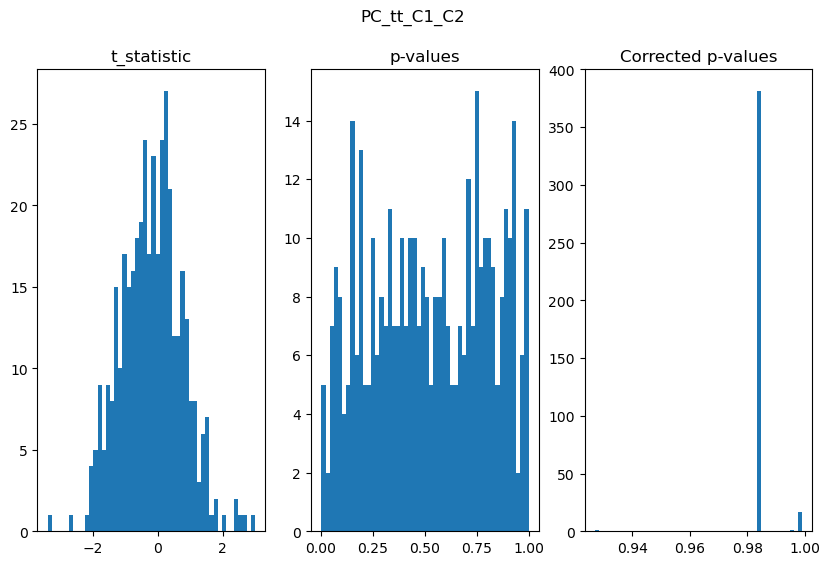

In [21]:
# Create function to plot results
def plot_stats(data, title):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 6))
    fig.suptitle(str(title))
    
    axs[0].hist(data["t_statistic"], bins=50)
    axs[0].set_title('t_statistic')
    
    axs[1].hist(data["p_val"], bins=50)
    axs[1].set_title('p-values')
    
    axs[2].hist(data["corrected_p_val"], bins=50)
    axs[2].set_title('Corrected p-values')
    
    plt.show()

plot_stats(PC_tt_C1_C2, "PC_tt_C1_C2")

### PC (C1 - C3) (low interference, easy search - high interference, easy search)

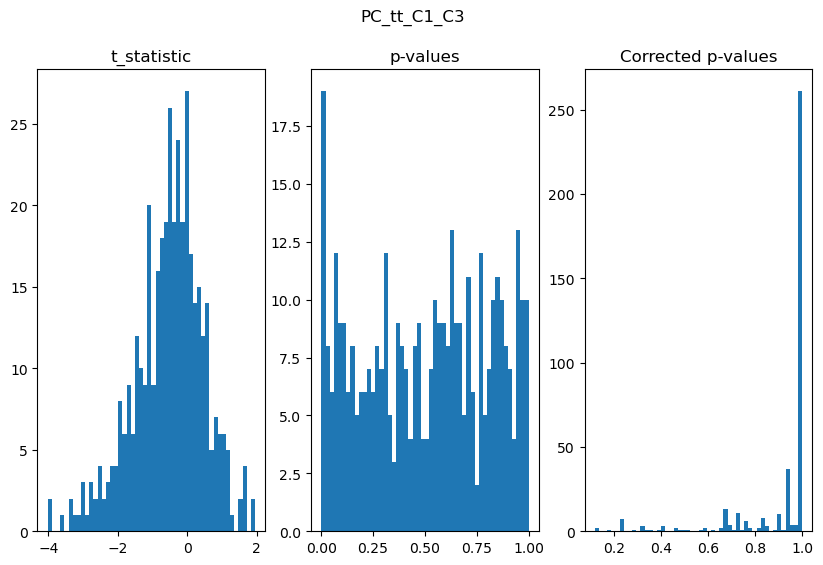

In [22]:
plot_stats(PC_tt_C1_C3, "PC_tt_C1_C3")

### PC (C1 - C4) (low interference, easy search - high interference, hard search)


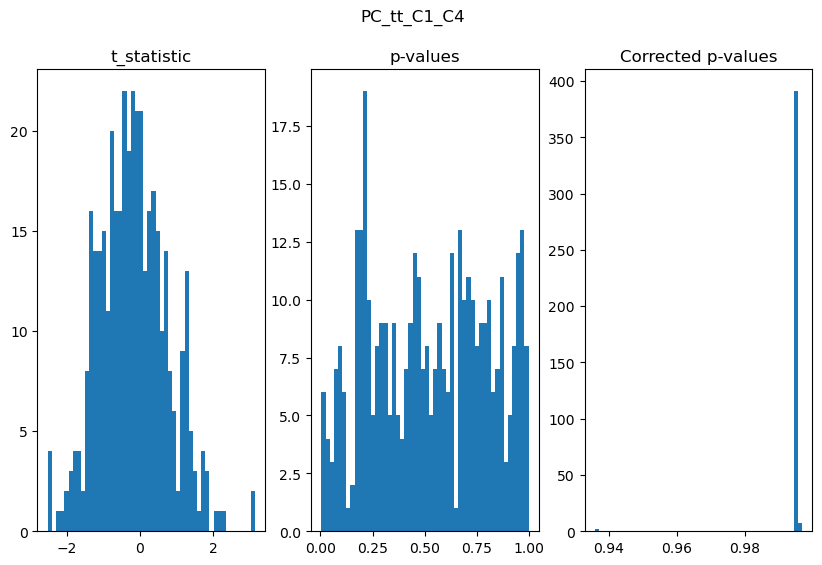

In [23]:
plot_stats(PC_tt_C1_C4, "PC_tt_C1_C4")

### PC (C2 - C3) (low interference, hard search - high interference, easy search)

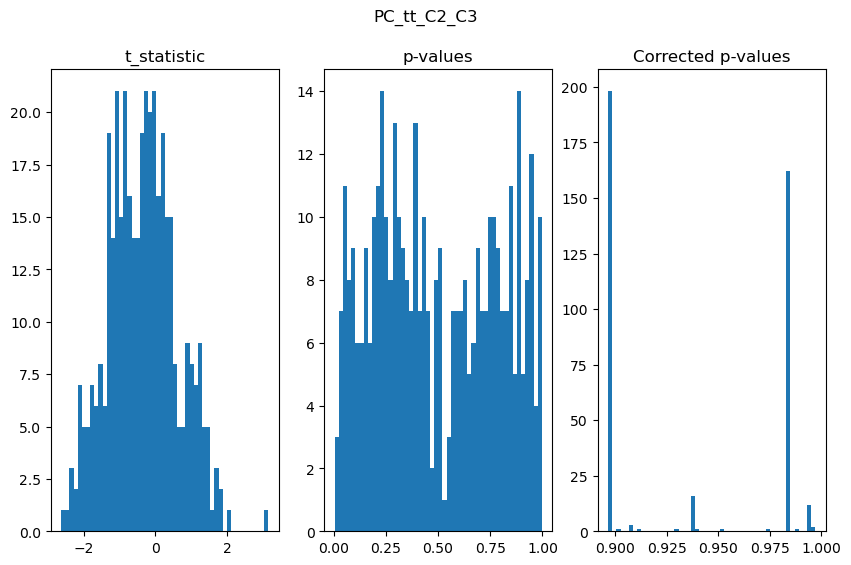

In [24]:
plot_stats(PC_tt_C2_C3, "PC_tt_C2_C3")

### PC (C2 - C4) (low interference, hard search - high interference, hard search)

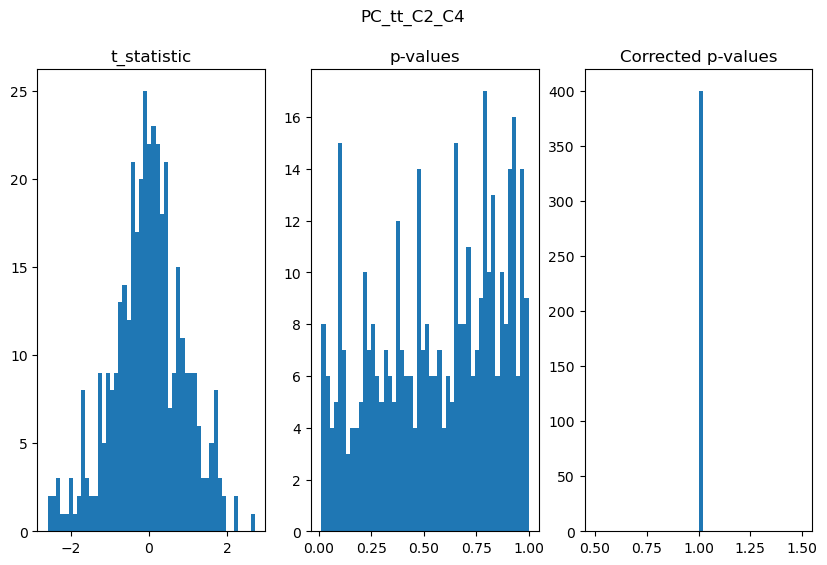

In [25]:
plot_stats(PC_tt_C2_C4, "PC_tt_C2_C4")

### PC (C3 - C4) (high interference, easy search - high interference, hard search)

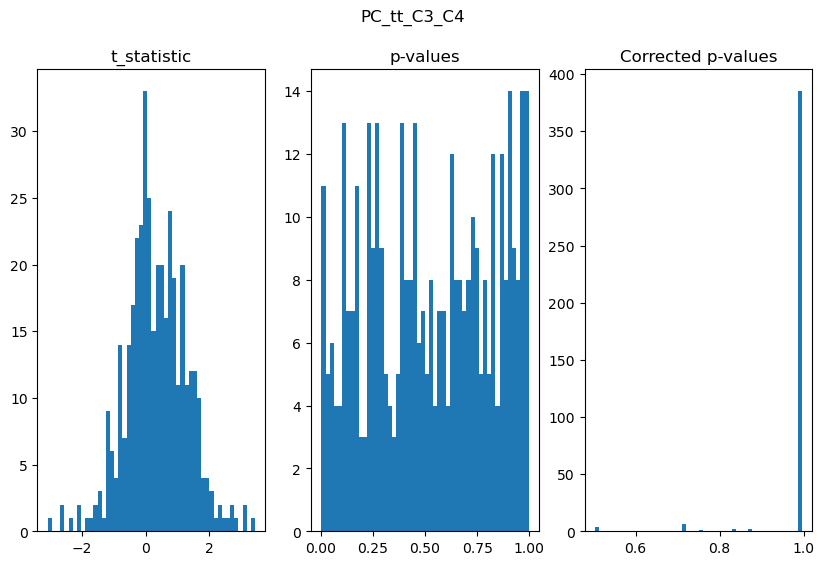

In [26]:
plot_stats(PC_tt_C3_C4, "PC_tt_C3_C4")

### WCS (C1 - C2) (low interference, easy search - low interference, hard search)

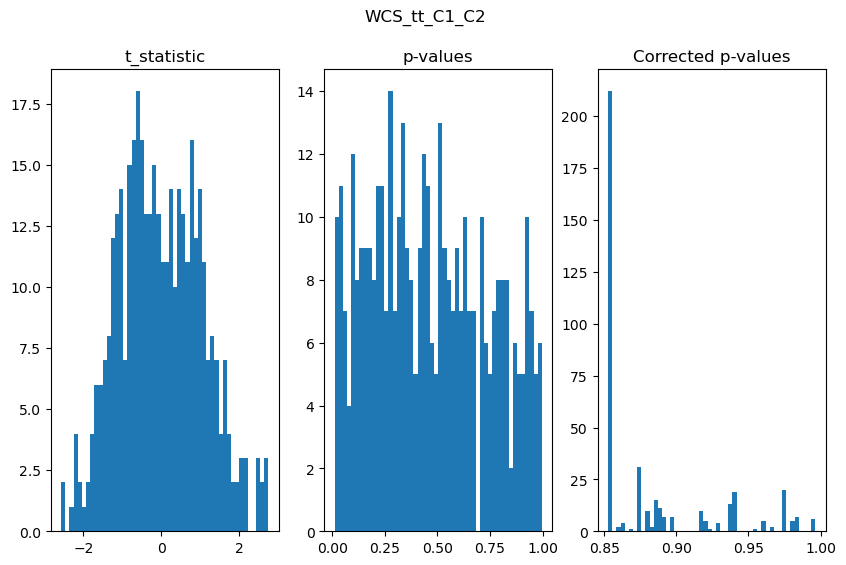

In [27]:
plot_stats(WCS_tt_C1_C2, "WCS_tt_C1_C2")

### WCS (C1 - C3) (low interference, easy search - high interference, easy search)

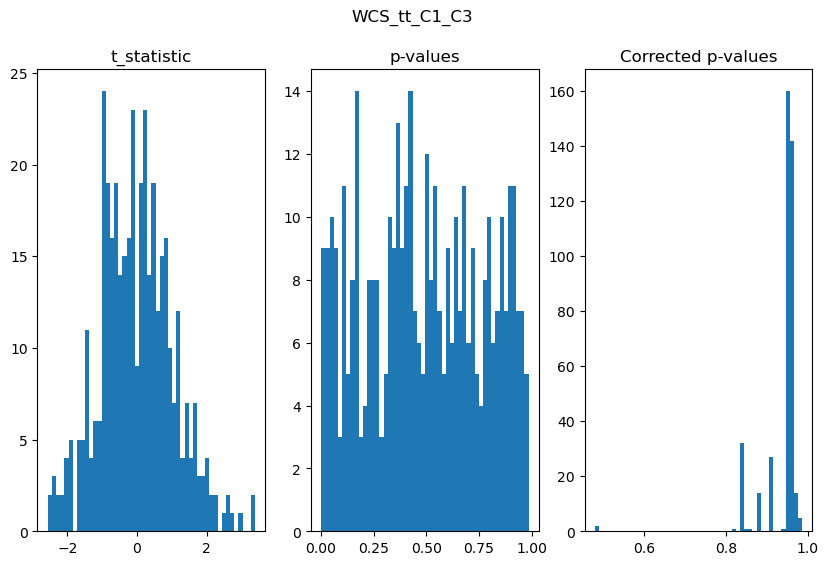

In [28]:
plot_stats(WCS_tt_C1_C3, "WCS_tt_C1_C3")

### WCS (C1 - C4) (low interference, easy search - high interference, hard search)


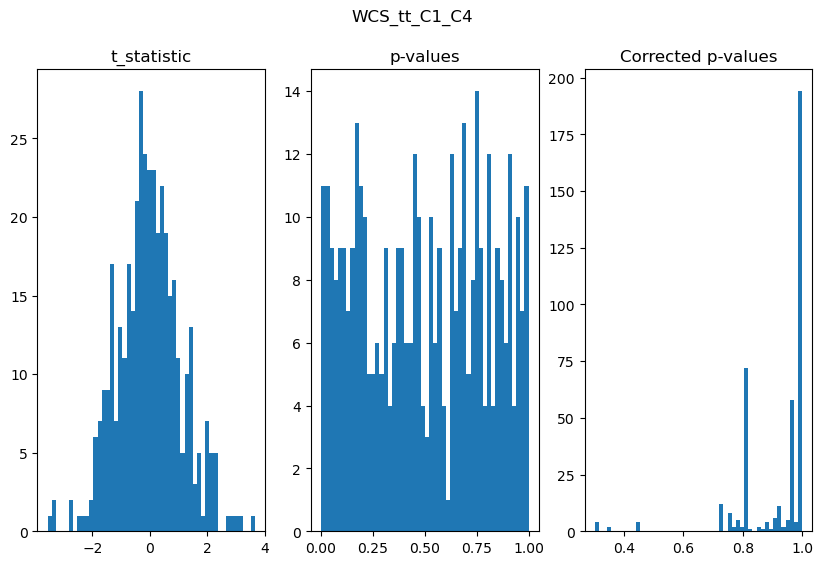

In [29]:
plot_stats(WCS_tt_C1_C4, "WCS_tt_C1_C4")

### WCS (C2 - C3) (low interference, hard search - high interference, easy search)

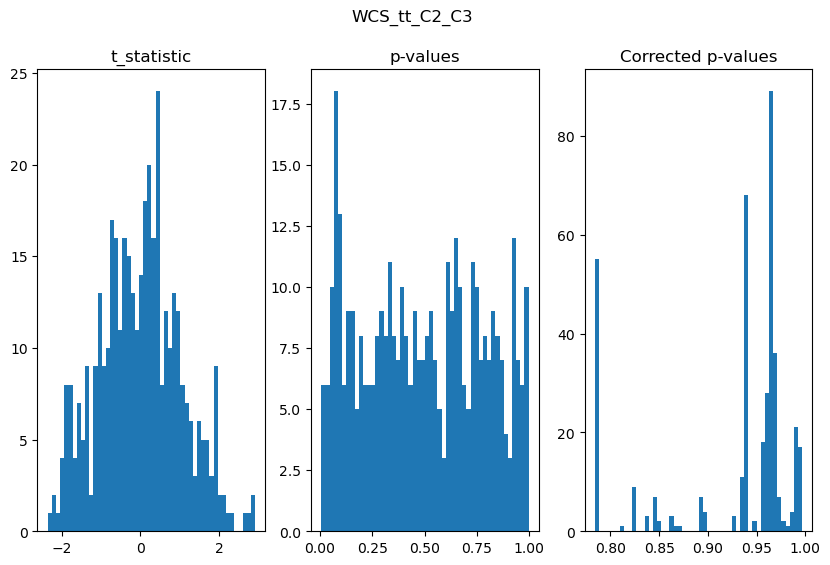

In [30]:
plot_stats(WCS_tt_C2_C3, "WCS_tt_C2_C3")

### WCS (C2 - C4) (low interference, hard search - high interference, hard search)

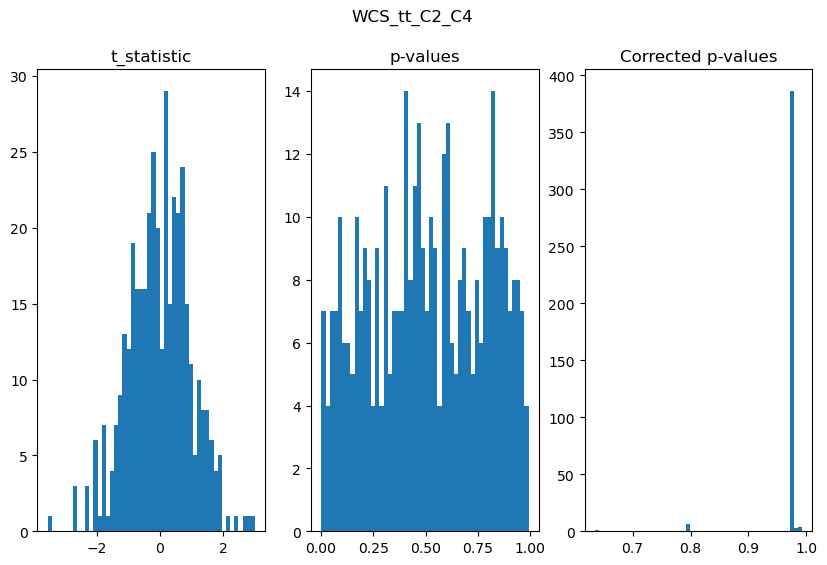

In [31]:
plot_stats(WCS_tt_C2_C4, "WCS_tt_C2_C4")

### WCS (C3 - C4) (high interference, easy search - high interference, hard search)

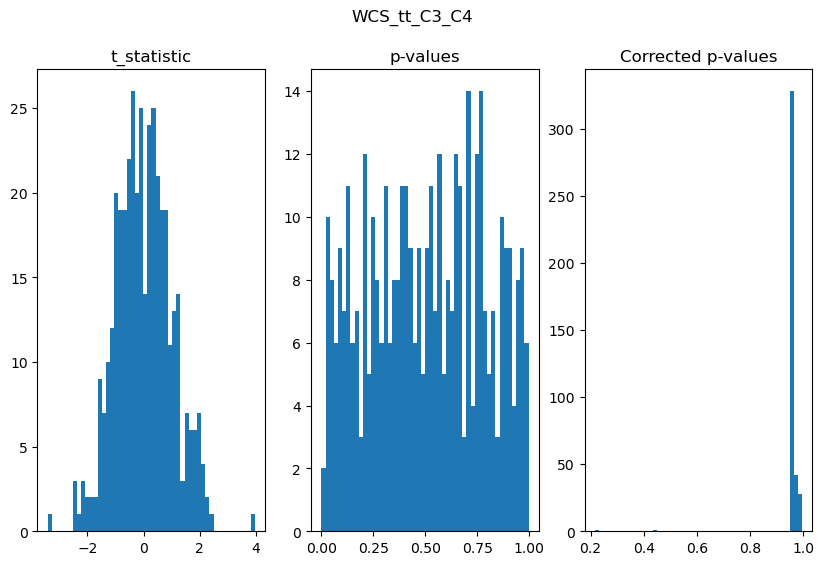

In [32]:
plot_stats(WCS_tt_C3_C4, "WCS_tt_C3_C4")

## Get coordinates from each node

In [33]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [34]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Create Function to remove background and save images


In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img


## Brain-plots

### Brain-plot PC t-statistics (C1 - C2) (low interference, easy search - low interference, hard search)

In [36]:
# Create Scene 
SC_tt_PC_C1_C2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


In [37]:
#b_obj = BrainObj('B3', hemisphere="both", translucent=False)

def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    norm_arr = np.array(norm_arr)
    return norm_arr

def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    normal_array = normalize(data, 0, 1)
    
    s_obj.color_sources(data=normal_array, cmap="viridis")

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )
   
    

SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


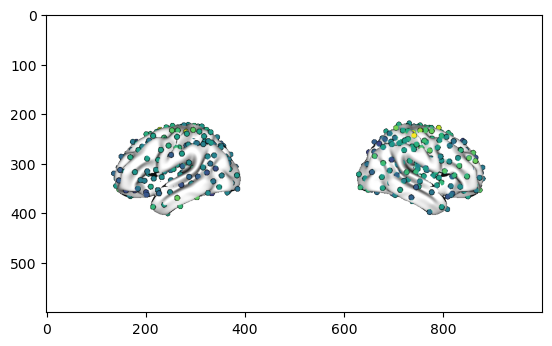

In [38]:
add_B3_to_scene(scene=SC_tt_PC_C1_C2_outer, data=PC_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C2_outer, data=PC_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c2_outer = RemoveBackground(SC_tt_PC_C1_C2_outer)
plt.imshow(sc_pc_c1_minus_c2_outer)
plt.show()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


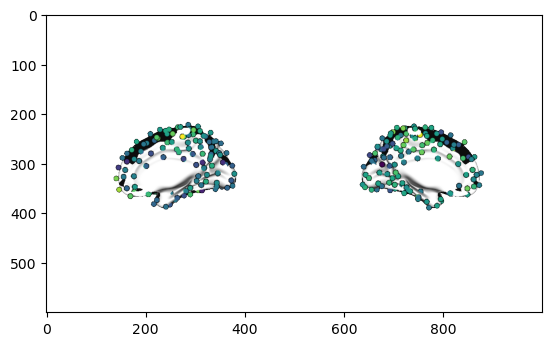

In [39]:
add_B3_to_scene(scene=SC_tt_PC_C1_C2_inner, data=PC_tt_C1_C2["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C2_inner, data=PC_tt_C1_C2["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c2_inner = RemoveBackground(SC_tt_PC_C1_C2_inner)
plt.imshow(sc_pc_c1_minus_c2_inner)
plt.show()

### Brain-plot PC t-statistics (C1 - C3) (low interference, easy search - high interference, easy search)

In [40]:
# Create Scene 
SC_tt_PC_C1_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


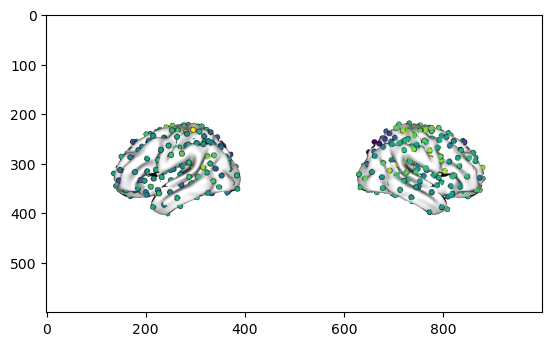

In [41]:
add_B3_to_scene(scene=SC_tt_PC_C1_C3_outer, data=PC_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C3_outer, data=PC_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c3_outer = RemoveBackground(SC_tt_PC_C1_C3_outer)
plt.imshow(sc_pc_c1_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


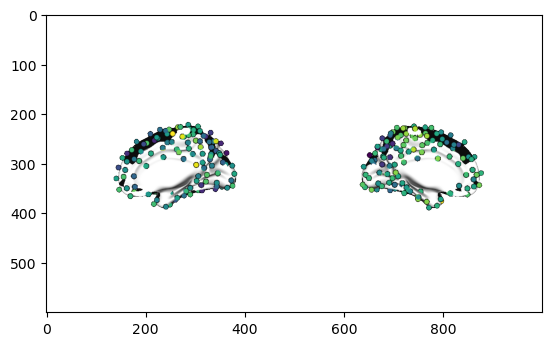

In [42]:
add_B3_to_scene(scene=SC_tt_PC_C1_C3_inner, data=PC_tt_C1_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C3_inner, data=PC_tt_C1_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c3_inner = RemoveBackground(SC_tt_PC_C1_C3_inner)
plt.imshow(sc_pc_c1_minus_c3_inner)
plt.show()


### Brain-plot PC t-statistics (C1 - C4) (low interference, easy search - high interference, hard search)


In [43]:
# Create Scene 
SC_tt_PC_C1_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C1_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


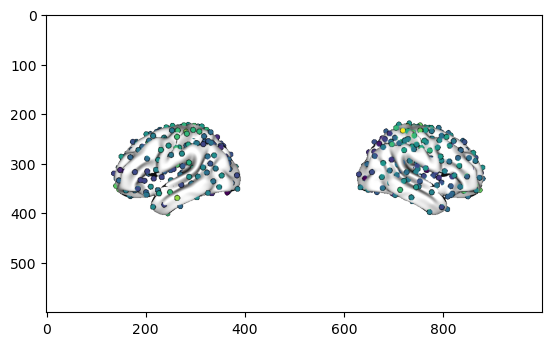

In [44]:
add_B3_to_scene(scene=SC_tt_PC_C1_C4_outer, data=PC_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C4_outer, data=PC_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c1_minus_c4_outer = RemoveBackground(SC_tt_PC_C1_C4_outer)
plt.imshow(sc_pc_c1_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


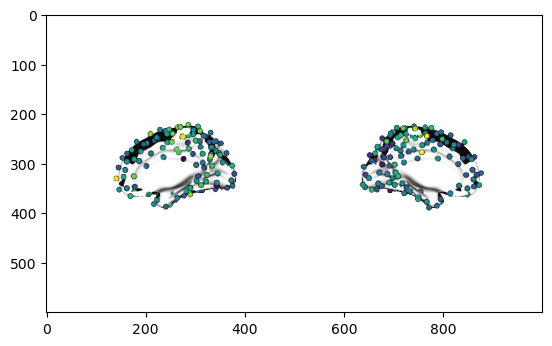

In [45]:
add_B3_to_scene(scene=SC_tt_PC_C1_C4_inner, data=PC_tt_C1_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C1_C4_inner, data=PC_tt_C1_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c1_minus_c4_inner = RemoveBackground(SC_tt_PC_C1_C4_inner)
plt.imshow(sc_pc_c1_minus_c4_inner)
plt.show()


### Brain-plot PC t-statistics (C2 - C3) (low interference, hard search - high interference, easy search)

In [46]:
# Create Scene 
SC_tt_PC_C2_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C2_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


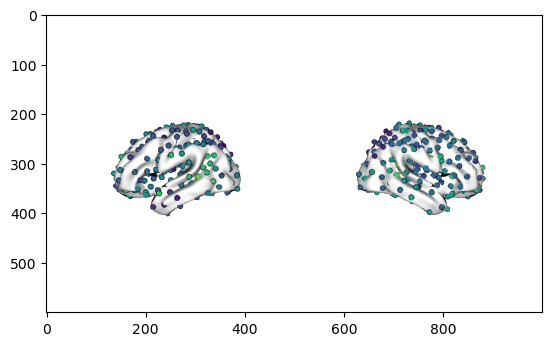

In [47]:
add_B3_to_scene(scene=SC_tt_PC_C2_C3_outer, data=PC_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C3_outer, data=PC_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c2_minus_c3_outer = RemoveBackground(SC_tt_PC_C2_C3_outer)
plt.imshow(sc_pc_c2_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


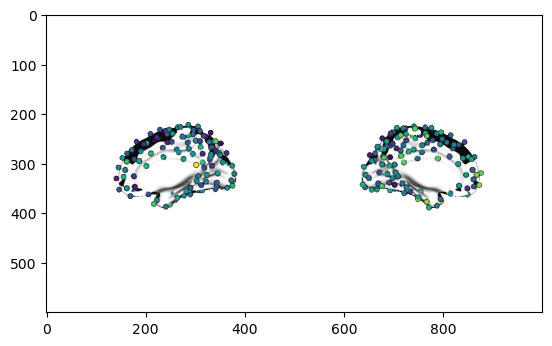

In [48]:
add_B3_to_scene(scene=SC_tt_PC_C2_C3_inner, data=PC_tt_C2_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C3_inner, data=PC_tt_C2_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c3_inner = RemoveBackground(SC_tt_PC_C2_C3_inner)
plt.imshow(sc_pc_c2_minus_c3_inner)
plt.show()


### Brain-plot PC t-statistics (C2 - C4) (low interference, hard search - high interference, hard search)

In [49]:
# Create Scene 
SC_tt_PC_C2_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C2_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


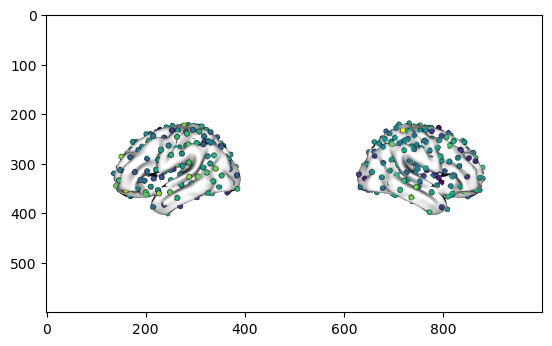

In [50]:
add_B3_to_scene(scene=SC_tt_PC_C2_C4_outer, data=PC_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C4_outer, data=PC_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c2_minus_c4_outer = RemoveBackground(SC_tt_PC_C2_C4_outer)
plt.imshow(sc_pc_c2_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


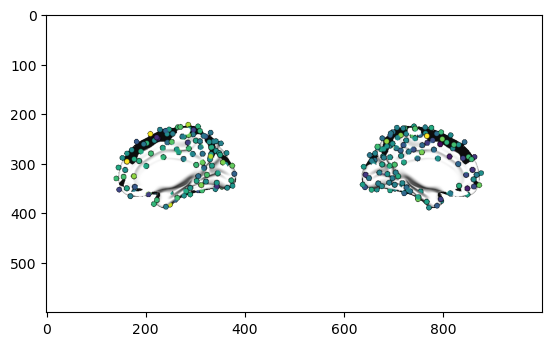

In [51]:
add_B3_to_scene(scene=SC_tt_PC_C2_C4_inner, data=PC_tt_C2_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C2_C4_inner, data=PC_tt_C2_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c2_minus_c4_inner = RemoveBackground(SC_tt_PC_C2_C4_inner)
plt.imshow(sc_pc_c2_minus_c4_inner)
plt.show()


### Brain-plot PC t-statistics (C3 - C4) (high interference, easy search - high interference, hard search)

In [52]:
# Create Scene 
SC_tt_PC_C3_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC_C3_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


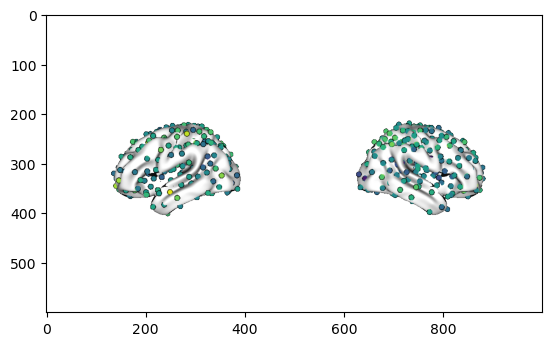

In [53]:
add_B3_to_scene(scene=SC_tt_PC_C3_C4_outer, data=PC_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C3_C4_outer, data=PC_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_pc_c3_minus_c4_outer = RemoveBackground(SC_tt_PC_C3_C4_outer)
plt.imshow(sc_pc_c3_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


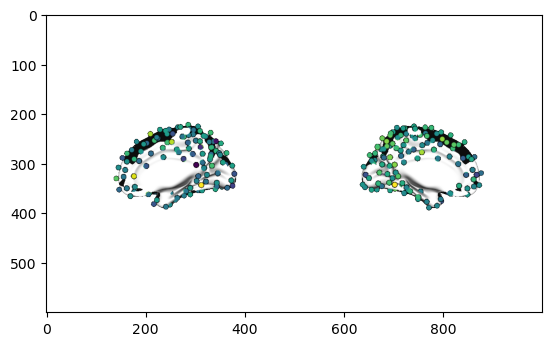

In [54]:
add_B3_to_scene(scene=SC_tt_PC_C3_C4_inner, data=PC_tt_C3_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC_C3_C4_inner, data=PC_tt_C3_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_pc_c3_minus_c4_inner = RemoveBackground(SC_tt_PC_C3_C4_inner)
plt.imshow(sc_pc_c3_minus_c4_inner)
plt.show()


### Brain-plot WCS t-statistics (C1 - C2) (low interference, easy search - low interference, hard search)

In [55]:
# Create Scene 
SC_tt_WCS_C1_C2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C2_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


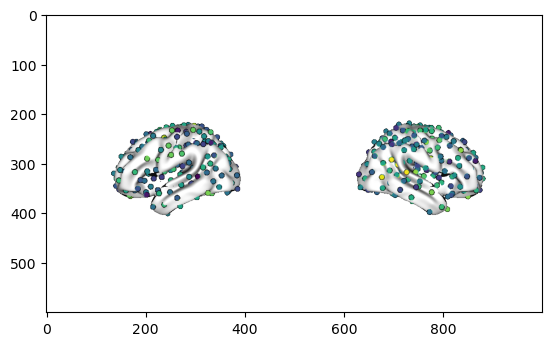

In [56]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_outer, data=WCS_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_outer, data=WCS_tt_C1_C2["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c2_outer = RemoveBackground(SC_tt_WCS_C1_C2_outer)
plt.imshow(sc_wcs_c1_minus_c2_outer)
plt.show()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


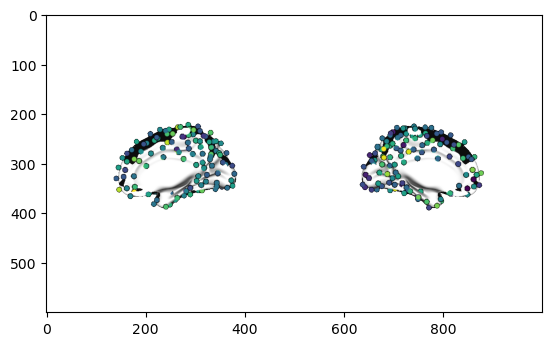

In [57]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_inner, data=WCS_tt_C1_C2["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C2_inner, data=WCS_tt_C1_C2["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c2_inner = RemoveBackground(SC_tt_WCS_C1_C2_inner)
plt.imshow(sc_wcs_c1_minus_c2_inner)
plt.show()

### Brain-plot WCS t-statistics (C1 - C3) (low interference, easy search - high interference, easy search)

In [58]:
# Create Scene 
SC_tt_WCS_C1_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


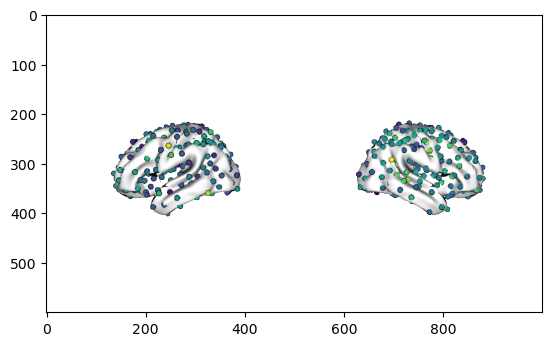

In [59]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_outer, data=WCS_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_outer, data=WCS_tt_C1_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c3_outer = RemoveBackground(SC_tt_WCS_C1_C3_outer)
plt.imshow(sc_wcs_c1_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


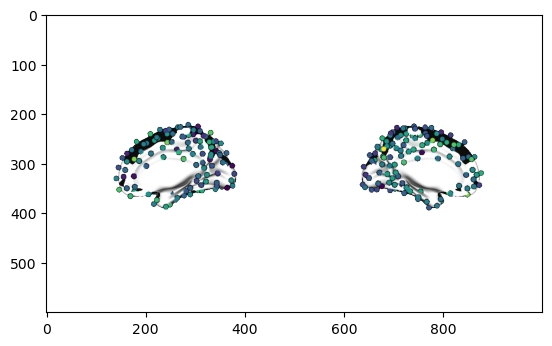

In [60]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_inner, data=WCS_tt_C1_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C3_inner, data=WCS_tt_C1_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c3_inner = RemoveBackground(SC_tt_WCS_C1_C3_inner)
plt.imshow(sc_wcs_c1_minus_c3_inner)
plt.show()

### Brain-plot WCS t-statistics (C1 - C4) (low interference, easy search - high interference, hard search)

In [61]:
# Create Scene 
SC_tt_WCS_C1_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C1_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


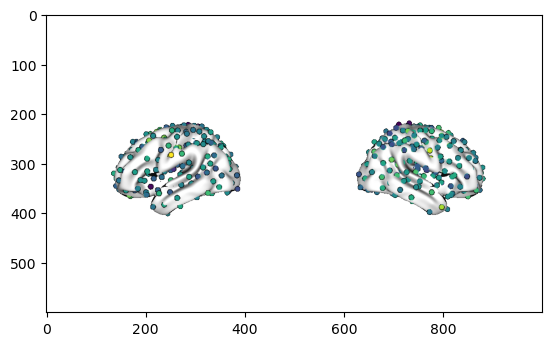

In [62]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_outer, data=WCS_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_outer, data=WCS_tt_C1_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c1_minus_c4_outer = RemoveBackground(SC_tt_WCS_C1_C4_outer)
plt.imshow(sc_wcs_c1_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


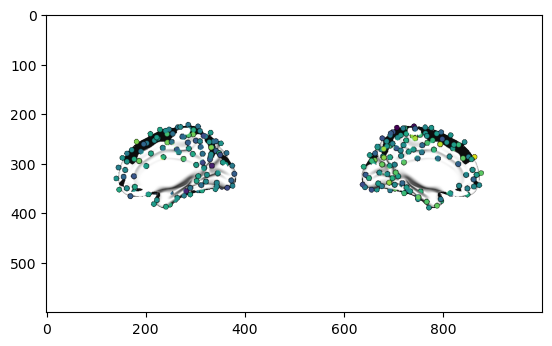

In [63]:
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_inner, data=WCS_tt_C1_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C1_C4_inner, data=WCS_tt_C1_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c1_minus_c4_inner = RemoveBackground(SC_tt_WCS_C1_C4_inner)
plt.imshow(sc_wcs_c1_minus_c4_inner)
plt.show()

### Brain-plot WCS t-statistics (C2 - C3) (low interference, hard search - high interference, easy search)

In [64]:
# Create Scene 
SC_tt_WCS_C2_C3_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C2_C3_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


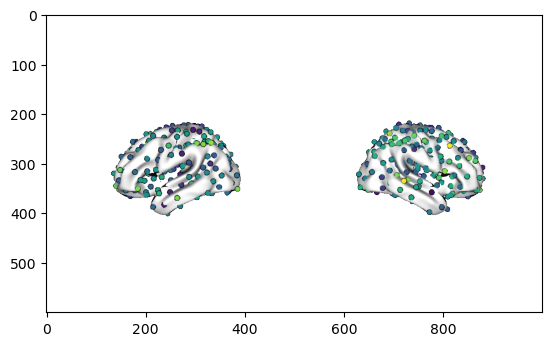

In [65]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_outer, data=WCS_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_outer, data=WCS_tt_C2_C3["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c3_outer = RemoveBackground(SC_tt_WCS_C2_C3_outer)
plt.imshow(sc_wcs_c2_minus_c3_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


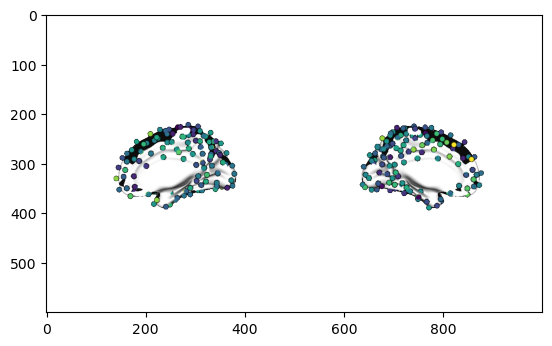

In [66]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_inner, data=WCS_tt_C2_C3["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C3_inner, data=WCS_tt_C2_C3["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c3_inner = RemoveBackground(SC_tt_WCS_C2_C3_inner)
plt.imshow(sc_wcs_c2_minus_c3_inner)
plt.show()

### Brain-plot WCS t-statistics (C2 - C4) (low interference, hard search - high interference, hard search)

In [67]:
# Create Scene 
SC_tt_WCS_C2_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C2_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


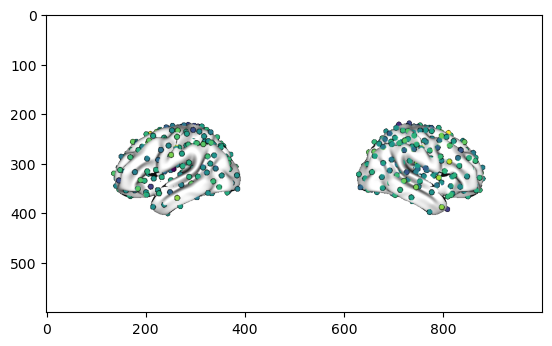

In [68]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_outer, data=WCS_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_outer, data=WCS_tt_C2_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c2_minus_c4_outer = RemoveBackground(SC_tt_WCS_C2_C4_outer)
plt.imshow(sc_wcs_c2_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


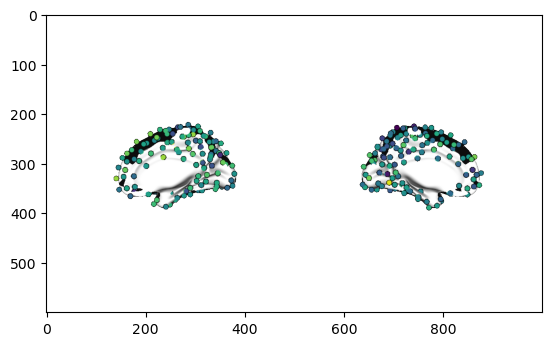

In [69]:
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_inner, data=WCS_tt_C2_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C2_C4_inner, data=WCS_tt_C2_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c2_minus_c4_inner = RemoveBackground(SC_tt_WCS_C2_C4_inner)
plt.imshow(sc_wcs_c2_minus_c4_inner)
plt.show()

### Brain-plot WCS t-statistics (C3 - C4) (high interference, easy search - high interference, hard search)

In [70]:
# Create Scene 
SC_tt_WCS_C3_C4_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS_C3_C4_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


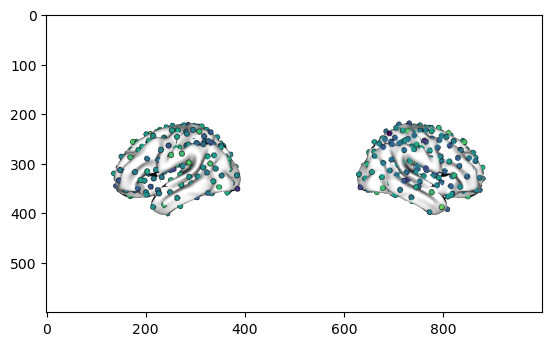

In [71]:
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_outer, data=WCS_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_outer, data=WCS_tt_C3_C4["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')

sc_wcs_c3_minus_c4_outer = RemoveBackground(SC_tt_WCS_C3_C4_outer)
plt.imshow(sc_wcs_c3_minus_c4_outer)
plt.show()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene


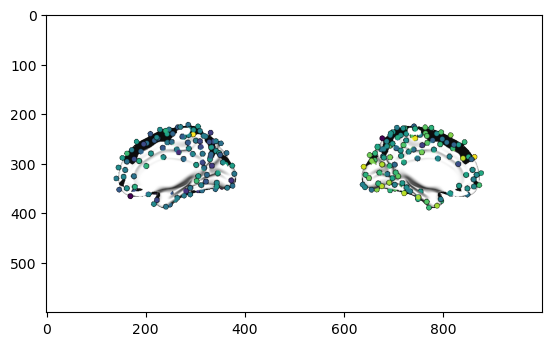

In [72]:
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_inner, data=WCS_tt_C3_C4["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS_C3_C4_inner, data=WCS_tt_C3_C4["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')

sc_wcs_c3_minus_c4_inner = RemoveBackground(SC_tt_WCS_C3_C4_inner)
plt.imshow(sc_wcs_c3_minus_c4_inner)
plt.show()

In [73]:
"""
Checked whether data is normally distributed. It is. 

#norm_1_s, norm_1_p = normaltest(c1_pc_df[0, :], nan_policy="omit")
#print(norm_1_s)
#print(norm_1_p)

"""

'\nChecked whether data is normally distributed. It is. \n\n#norm_1_s, norm_1_p = normaltest(c1_pc_df[0, :], nan_policy="omit")\n#print(norm_1_s)\n#print(norm_1_p)\n\n'

In [74]:
"""
Notes: 
<br>
"The participation coefficient of a node is therefore close to 1 if its links are
uniformly distributed among all the modules and 0 if all its links are within its own
module. (Guimerà R, Nunes Amaral LA (2005) Functional cartography of complex metabolic
networks. Nature)"
<br>
When calculating difference in PC between conditions what to do with negative scores?
"""

'\nNotes: \n<br>\n"The participation coefficient of a node is therefore close to 1 if its links are\nuniformly distributed among all the modules and 0 if all its links are within its own\nmodule. (Guimerà R, Nunes Amaral LA (2005) Functional cartography of complex metabolic\nnetworks. Nature)"\n<br>\nWhen calculating difference in PC between conditions what to do with negative scores?\n'

In [75]:
"""
pc_c1_minus_c2 = np.array(c1_total_pc_mean - c2_total_pc_mean)
pc_c1_minus_c3 = np.array(c1_total_pc_mean - c3_total_pc_mean)
pc_c1_minus_c4 = np.array(c1_total_pc_mean - c4_total_pc_mean)
pc_c2_minus_c3 = np.array(c2_total_pc_mean - c3_total_pc_mean)
pc_c2_minus_c4 = np.array(c2_total_pc_mean - c4_total_pc_mean)
pc_c3_minus_c4 = np.array(c3_total_pc_mean - c4_total_pc_mean)

print("pc_c1_minus_c2 shape: " + str(pc_c1_minus_c2.shape))
print("pc_c1_minus_c3 shape: " + str(pc_c1_minus_c3.shape))
print("pc_c1_minus_c4 shape: " + str(pc_c1_minus_c4.shape))
print("pc_c2_minus_c3 shape: " + str(pc_c2_minus_c3.shape))
print("pc_c2_minus_c4 shape: " + str(pc_c2_minus_c4.shape))
print("pc_c3_minus_c4 shape: " + str(pc_c3_minus_c4.shape))

wcs_c1_minus_c2 = np.array(c1_total_wcs_mean - c2_total_wcs_mean)
wcs_c1_minus_c3 = np.array(c1_total_wcs_mean - c3_total_wcs_mean)
wcs_c1_minus_c4 = np.array(c1_total_wcs_mean - c4_total_wcs_mean)
wcs_c2_minus_c3 = np.array(c2_total_wcs_mean - c3_total_wcs_mean)
wcs_c2_minus_c4 = np.array(c2_total_wcs_mean - c4_total_wcs_mean)
wcs_c3_minus_c4 = np.array(c3_total_wcs_mean - c4_total_wcs_mean)

print("wcs_c1_minus_c2 shape: " + str(wcs_c1_minus_c2.shape))
print("wcs_c1_minus_c3 shape: " + str(wcs_c1_minus_c3.shape))
print("wcs_c1_minus_c4 shape: " + str(wcs_c1_minus_c4.shape))
print("wcs_c2_minus_c3 shape: " + str(wcs_c2_minus_c3.shape))
print("wcs_c2_minus_c4 shape: " + str(wcs_c2_minus_c4.shape))
print("wcs_c3_minus_c4 shape: " + str(wcs_c3_minus_c4.shape))
"""

'\npc_c1_minus_c2 = np.array(c1_total_pc_mean - c2_total_pc_mean)\npc_c1_minus_c3 = np.array(c1_total_pc_mean - c3_total_pc_mean)\npc_c1_minus_c4 = np.array(c1_total_pc_mean - c4_total_pc_mean)\npc_c2_minus_c3 = np.array(c2_total_pc_mean - c3_total_pc_mean)\npc_c2_minus_c4 = np.array(c2_total_pc_mean - c4_total_pc_mean)\npc_c3_minus_c4 = np.array(c3_total_pc_mean - c4_total_pc_mean)\n\nprint("pc_c1_minus_c2 shape: " + str(pc_c1_minus_c2.shape))\nprint("pc_c1_minus_c3 shape: " + str(pc_c1_minus_c3.shape))\nprint("pc_c1_minus_c4 shape: " + str(pc_c1_minus_c4.shape))\nprint("pc_c2_minus_c3 shape: " + str(pc_c2_minus_c3.shape))\nprint("pc_c2_minus_c4 shape: " + str(pc_c2_minus_c4.shape))\nprint("pc_c3_minus_c4 shape: " + str(pc_c3_minus_c4.shape))\n\nwcs_c1_minus_c2 = np.array(c1_total_wcs_mean - c2_total_wcs_mean)\nwcs_c1_minus_c3 = np.array(c1_total_wcs_mean - c3_total_wcs_mean)\nwcs_c1_minus_c4 = np.array(c1_total_wcs_mean - c4_total_wcs_mean)\nwcs_c2_minus_c3 = np.array(c2_total_wcs_me